## Exploratory Data Analyst
> **Google Case study**\
> Auto: Joshua Kabwanga


#### Introduction

Welcome to the Cyclistic bike-share analysis case study! In this case study, I will perform a real-world tasks of a data analyst. 
 In order to answer the key business questions, I will follow the steps of the data analysis process: ask, prepare, process, analyze, share, and act . Along the way, the Case Study Roadmap tables — including guiding questions and key tasks

### About the company

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these programm possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Loading necessary Libarary 

In [2]:
#ignore the waening
import warnings
warnings.filterwarnings('ignore')

In [3]:
# for dataframe
import os
import pandas as pd 
import numpy as np

# for visualization
import matplotlib as mpl
import plotly.graph_objs as go
import matplotlib.pyplot as plt  #create box
import seaborn as sns  #visualize
import plotly.express as px
import plotly.figure_factory as ff
%matplotlib inline

I'm going the load the dataset, the dataset consist of 12 files each file consist of a month of the year from March 2022 to Febuary 2023, so the 12 different month of each file will be conbined into one file to make ths analysis easy to understand.

In [4]:
data = os.getcwd()

In [5]:
print(data)

e:\Download\data\Sharing_byciclistic_data


In [6]:
#load the dataset
import pandas as pd

# List of file names
file_names = [
    "202203-divvy-tripdata.csv", "202204-divvy-tripdata.csv", "202205-divvy-tripdata.csv",
    "202206-divvy-tripdata.csv", "202207-divvy-tripdata.csv", "202208-divvy-tripdata.csv",
    "202209-divvy-tripdata.csv", "202210-divvy-tripdata.csv", "202211-divvy-tripdata.csv",
    "202212-divvy-tripdata.csv", "202301-divvy-tripdata.csv", "202302-divvy-tripdata.csv"
]

# Load all CSV files into a list of DataFrames
data_frames = [pd.read_csv(file) for file in file_names]

# Optionally, you can concatenate all DataFrames into a single DataFrame
all_bike_data = pd.concat(data_frames, ignore_index=True)

# Display the first few rows of the combined DataFrame
bike = pd.DataFrame(all_bike_data)


In [7]:
# view the first file loaded which is march month
bike.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.886875,-87.626030,41.889177,-87.638506,member
1,8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.900998,-87.623752,41.898203,-87.637536,member
2,EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,41.978353,-87.659753,41.984045,-87.660274,member
3,9F446FD9DEE3F389,classic_bike,2022-03-01 19:12:26,2022-03-01 19:22:14,Wabash Ave & Wacker Pl,TA1307000131,Franklin St & Jackson Blvd,TA1305000025,41.886875,-87.626030,41.877708,-87.635321,member
4,431128AD9AFFEDC0,classic_bike,2022-03-21 18:37:01,2022-03-21 19:19:11,DuSable Lake Shore Dr & North Blvd,LF-005,Loomis St & Jackson Blvd,13206,41.911722,-87.626804,41.877945,-87.662007,member


The 12 dataset was successfully load, now i'm going to merge it into 1 dataset for the purpose of this analysis

After loading the file i want to conbine the 12 months into one using ```concat function ```

## Data Transformation

In [8]:
#view the data type of each column
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5829084 entries, 0 to 5829083
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 578.1+ MB


We'll need to work on the start at column which should be datetime format but it as object 

In [9]:
#Convert to time format
bike['started_at'] = pd.to_datetime(bike['started_at'])
bike['ended_at'] = pd.to_datetime(bike['ended_at'])

In [10]:
bike.started_at


0         2022-03-21 13:45:01
1         2022-03-16 09:37:16
2         2022-03-23 19:52:02
3         2022-03-01 19:12:26
4         2022-03-21 18:37:01
                  ...        
5829079   2023-02-08 21:57:22
5829080   2023-02-19 11:29:09
5829081   2023-02-07 09:01:33
5829082   2023-02-22 08:33:22
5829083   2023-02-01 21:52:17
Name: started_at, Length: 5829084, dtype: datetime64[ns]

We use this functions bellow to extract the most import feature from started at column such as month, day of the week and hours column.

In [13]:
bike['Month']=pd.to_datetime(bike['started_at']).dt.strftime('%B')
bike['day of week']=pd.to_datetime(bike['started_at']).dt.strftime('%A')
bike['hours'] = pd.to_datetime(bike['started_at']).dt.hour


#with the function below we'll create a new column which show the trips duration of customers in minutes
bike['ride_duration'] = (bike['ended_at'] - bike['started_at']).dt.total_seconds().abs()/60
#then will convert the numberic to int forma
bike['ride_duration'] = bike['ride_duration'].astype(int)


In [14]:
bike.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Month,day of week,hours,ride_duration
0,47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.886875,-87.626030,41.889177,-87.638506,member,March,Monday,13,6
1,8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.900998,-87.623752,41.898203,-87.637536,member,March,Wednesday,9,6
2,EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,41.978353,-87.659753,41.984045,-87.660274,member,March,Wednesday,19,2
3,9F446FD9DEE3F389,classic_bike,2022-03-01 19:12:26,2022-03-01 19:22:14,Wabash Ave & Wacker Pl,TA1307000131,Franklin St & Jackson Blvd,TA1305000025,41.886875,-87.626030,41.877708,-87.635321,member,March,Tuesday,19,9
4,431128AD9AFFEDC0,classic_bike,2022-03-21 18:37:01,2022-03-21 19:19:11,DuSable Lake Shore Dr & North Blvd,LF-005,Loomis St & Jackson Blvd,13206,41.911722,-87.626804,41.877945,-87.662007,member,March,Monday,18,42


In [15]:
bike['ride_duration'].describe()

count    5.829084e+06
mean     1.873291e+01
std      1.751565e+02
min      0.000000e+00
25%      5.000000e+00
50%      1.000000e+01
75%      1.800000e+01
max      4.138700e+04
Name: ride_duration, dtype: float64

The above output displayed the negotive value from the Ride length column but we need to remove it by using ```abs function```

The negative sign from ride_length is been successfully been removed

In [ ]:
#display the colums list   
bike.columns.tolist()

['ride_id',
 'rideable_type',
 'started_at',
 'ended_at',
 'start_station_name',
 'start_station_id',
 'end_station_name',
 'end_station_id',
 'start_lat',
 'start_lng',
 'end_lat',
 'end_lng',
 'member_casual',
 'Month',
 'day of week',
 'hours',
 'ride_duration']

In [16]:
#check for duplicates value
bike.duplicated().sum()

np.int64(0)

## EDA
#### What is EDA?
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

EDA helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions

In [18]:
bike.groupby('Month')['ride_duration'].aggregate(['sum','max', 'mean', 'median'])


,sum,max,mean,median
Month,,,,
April,6365773,21122,17.146909,9.0
August,15850671,28129,20.167993,10.0
December,2365842,19157,13.013003,7.0
February,2484559,18865,13.046071,7.0
January,2381401,33603,12.513865,7.0
July,17212208,34208,20.901589,11.0
June,17072492,35820,22.195012,11.0
March,5115015,34354,18.007953,9.0
May,13083649,36257,20.608780,11.0


Let's calculate the total number of trips per each bike type

In [19]:
bike.groupby(['rideable_type', 'day of week'])['ride_id'].count()

rideable_type  day of week
classic_bike   Friday         362048
               Monday         359576
               Saturday       431324
               Sunday         370458
               Thursday       388148
               Tuesday        380714
               Wednesday      374647
docked_bike    Friday          23506
               Monday          22729
               Saturday        41177
               Sunday          36322
               Thursday        19861
               Tuesday         18026
               Wednesday       17464
electric_bike  Friday         434446
               Monday         389652
               Saturday       460796
               Sunday         394736
               Thursday       453033
               Tuesday        420202
               Wednesday      430219
Name: ride_id, dtype: int64

### Insight: 

The above result displayed the total number of trips base on the id trips. 
Docked_ bike: is the bike with lowest number of trip follow by classic bikes. 

With this in mind electrical bike display the most favor bike use by customer with the highest record.

In [ ]:
bike.pivot_table(index="rideable_type", columns="member_casual", values="ride_id", aggfunc="count")

member_casual,casual,member
rideable_type,,
classic_bike,905821.0,1761094.0
docked_bike,179085.0,NaN
electric_bike,1280214.0,1702870.0


### Insight:

From the result the show that the members customers don't use docked bike but mostly classic bike, 
And  most casual customers Prefered classic bike  

In [ ]:
#I would to calculate the average ride duration per customers
bike.pivot_table(index="rideable_type", columns="member_casual", values="ride_duration", aggfunc="mean")


member_casual,casual,member
rideable_type,,
classic_bike,28.069308,13.275550
docked_bike,122.959907,NaN
electric_bike,15.508179,10.873622


### Insigt:

> Casual Customer 
* Casual customrs with docked bike seems to have the highest average duration with 2h:02 minutes.
* follow by the classic bike from the casual customers with 28munite and 22.95% defference.
* follow by the electrical bike with 15 min wich is the lowest 

> Menbers customers
* Classic bike is 13 minutes average durations
* followe by electrical bike with 10 minutes average duration

In [ ]:
ride_type = bike.pivot_table(index="rideable_type", columns='day of week', values="ride_duration", aggfunc="mean")
ride_type.style.background_gradient(axis=0)

day of week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
rideable_type,,,,,,,
classic_bike,17.882955,17.345601,21.805012,21.825486,16.694768,16.139808,15.957870
docked_bike,129.111589,117.485239,126.747480,131.075849,115.397261,115.330023,112.471026
electric_bike,12.670831,12.432329,14.953205,14.937150,11.898087,11.551261,11.599632


### Insight:

From the above resulte, that displayed the average duration per bike type vs the day of the week.
Weekend is the most busy day with the highest avg of trip duration.

> Just as display in the above result:

* docked is the first on the list
* followes by classic bike 
* then electrical bike

### Visualisation

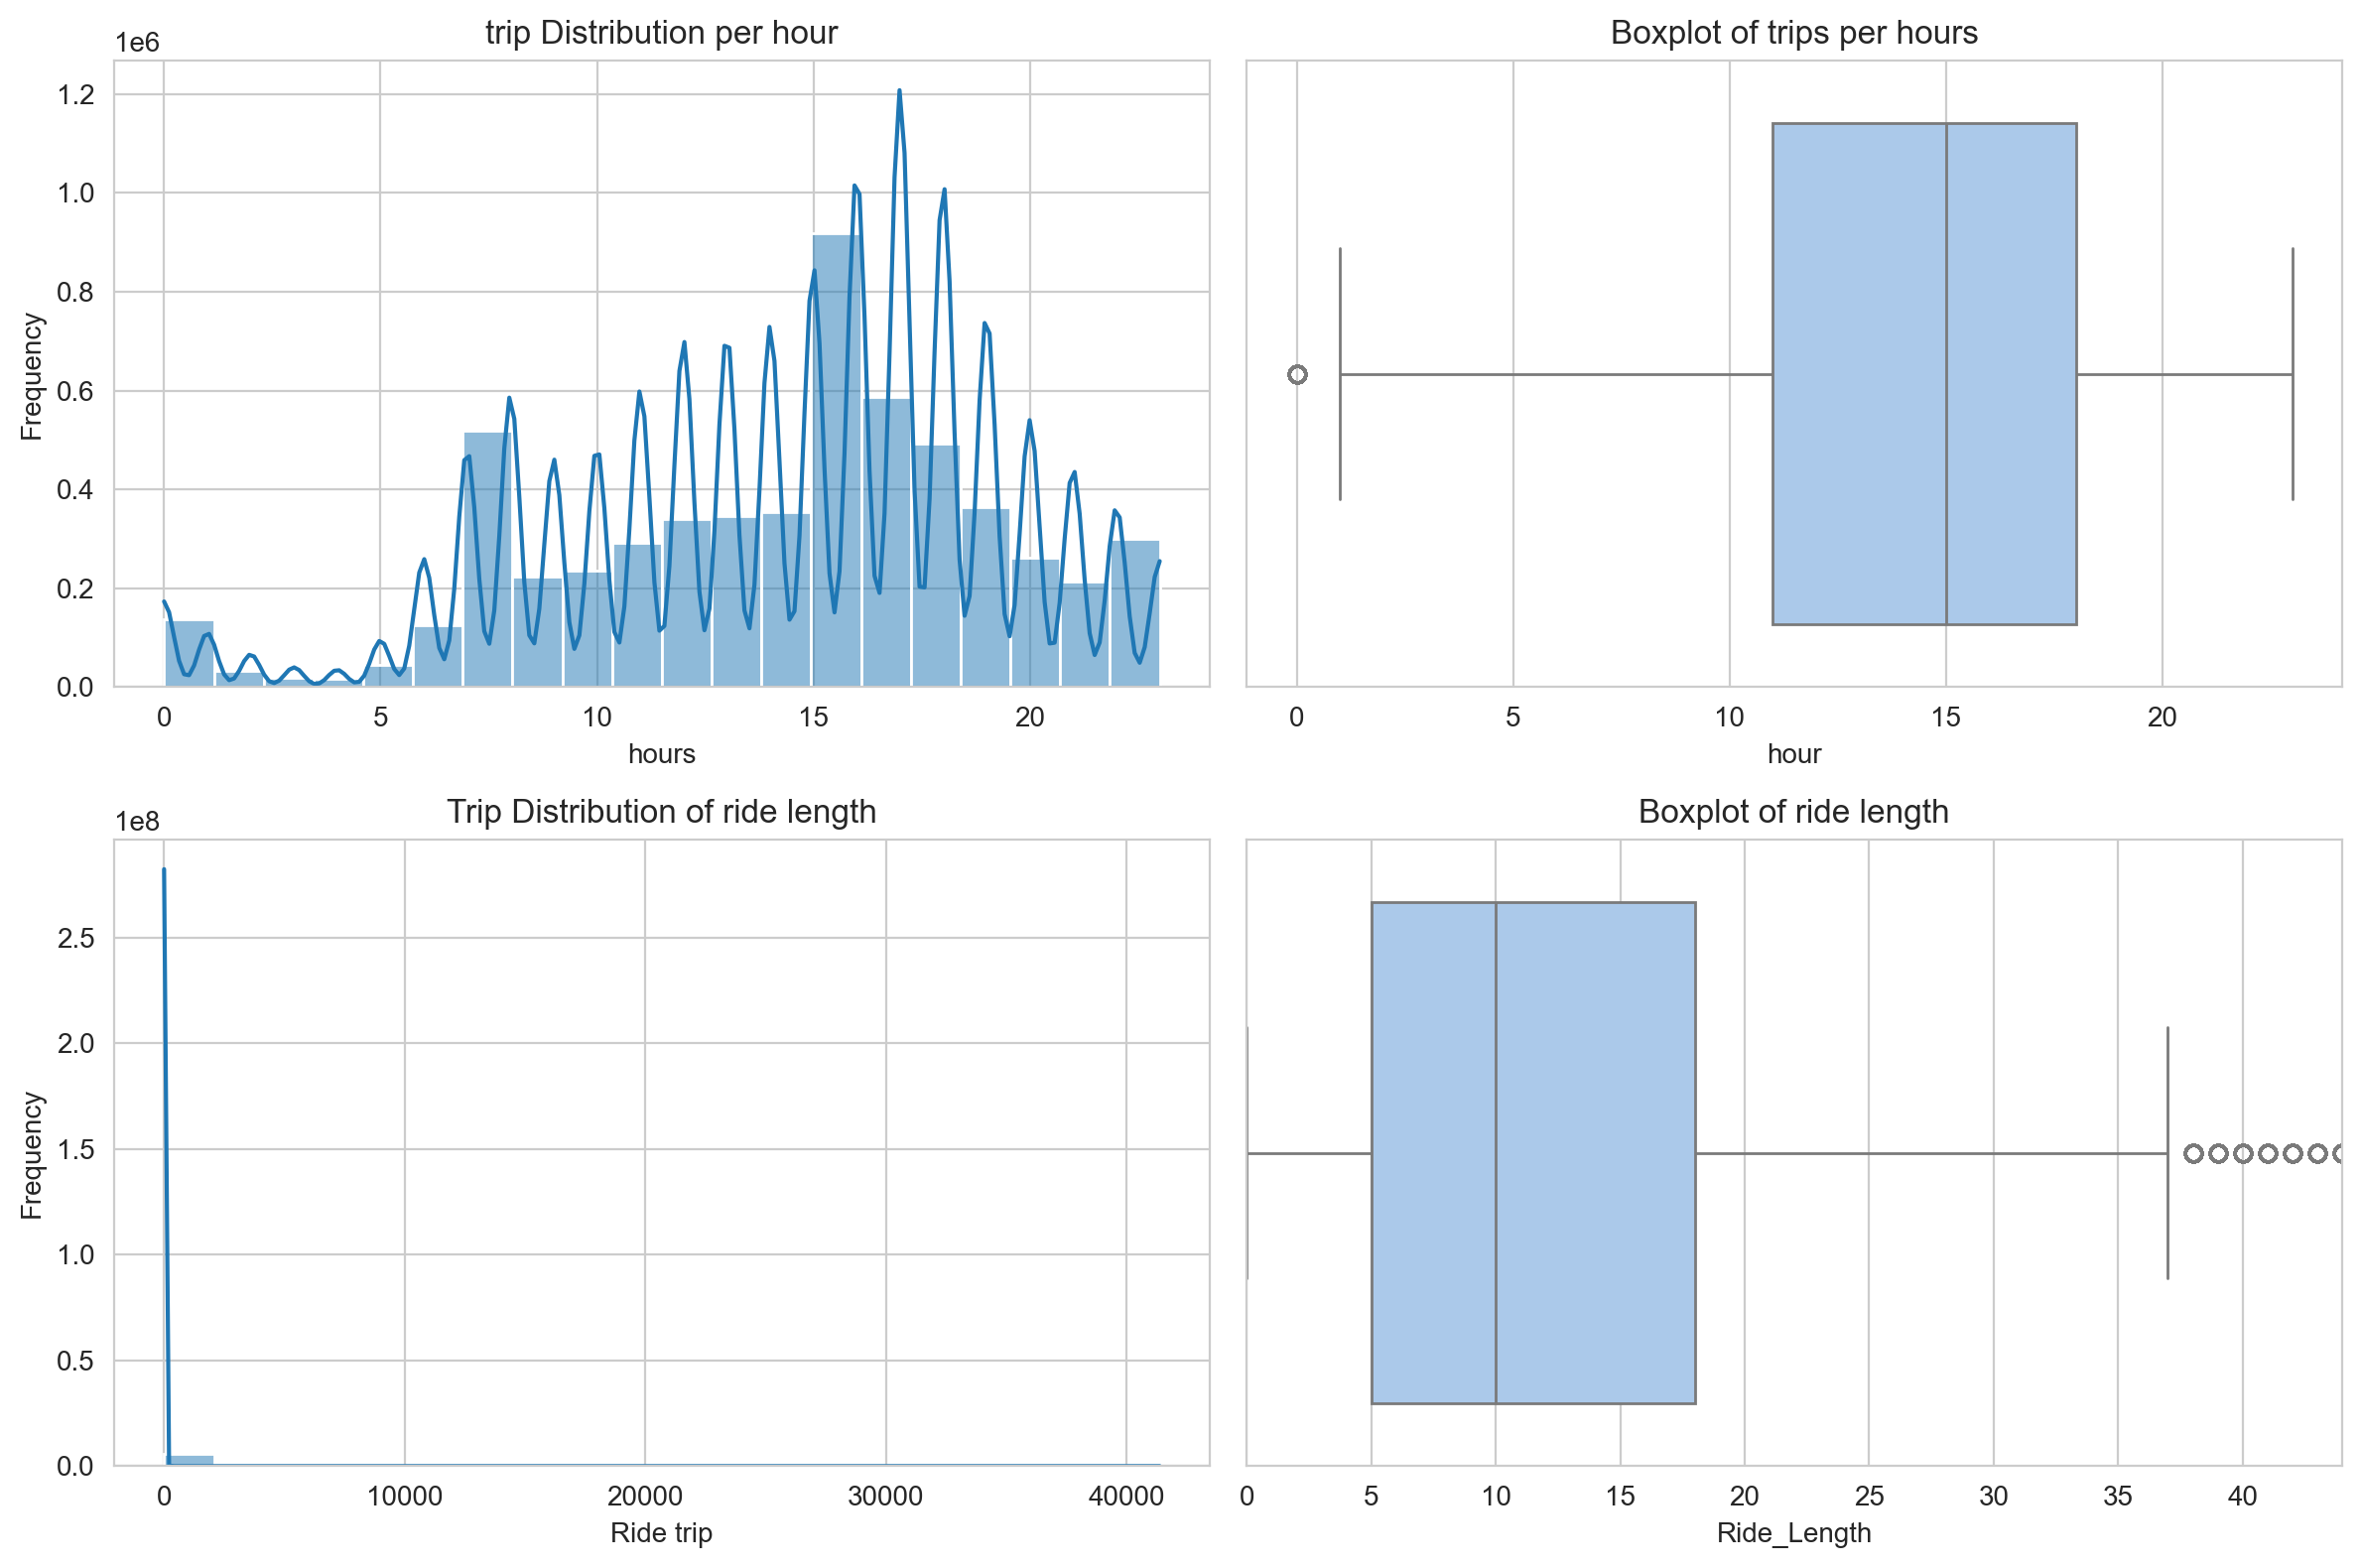

In [17]:
# apply the log transformation with NumPy
sns.set_style("whitegrid")
pal = sns.color_palette("pastel")

# Re-plot the adjusted visualizations
fig, ax = plt.subplots(2, 2, figsize=(12, 8), dpi=200)

# Histogram of trip per hour
sns.histplot(bike['hours'], bins=20, kde=True, ax=ax[0, 0], palette= pal)  # Drop NA values for clean plotting
ax[0, 0].set_title('trip Distribution per hour')
ax[0, 0].set_xlabel('hours')
ax[0, 0].set_ylabel('Frequency')

# Boxplot of trip per hour
sns.boxplot(x='hours', data=bike, ax=ax[0, 1], palette= pal)
ax[0, 1].set_title('Boxplot of trips per hours')
ax[0, 1].set_xlabel('hour')

# Histogram of  ride length
sns.histplot(bike['ride_duration'], bins=20, kde=True, ax=ax[1, 0], palette= pal)
ax[1, 0].set_title('Trip Distribution of ride length')
ax[1, 0].set_xlabel('Ride trip')
ax[1, 0].set_ylabel('Frequency')

# Boxplot of ride length
sns.boxplot(x='ride_duration', data=bike, ax=ax[1, 1], palette= pal)
ax[1, 1].set_title('Boxplot of ride length')
ax[1, 1].set_xlabel('Ride_Length')
ax[1, 1].set_xlim(0, bike['ride_duration'].quantile(0.95))  # Limiting x-axis to 95th percentile for better visualization

plt.tight_layout()

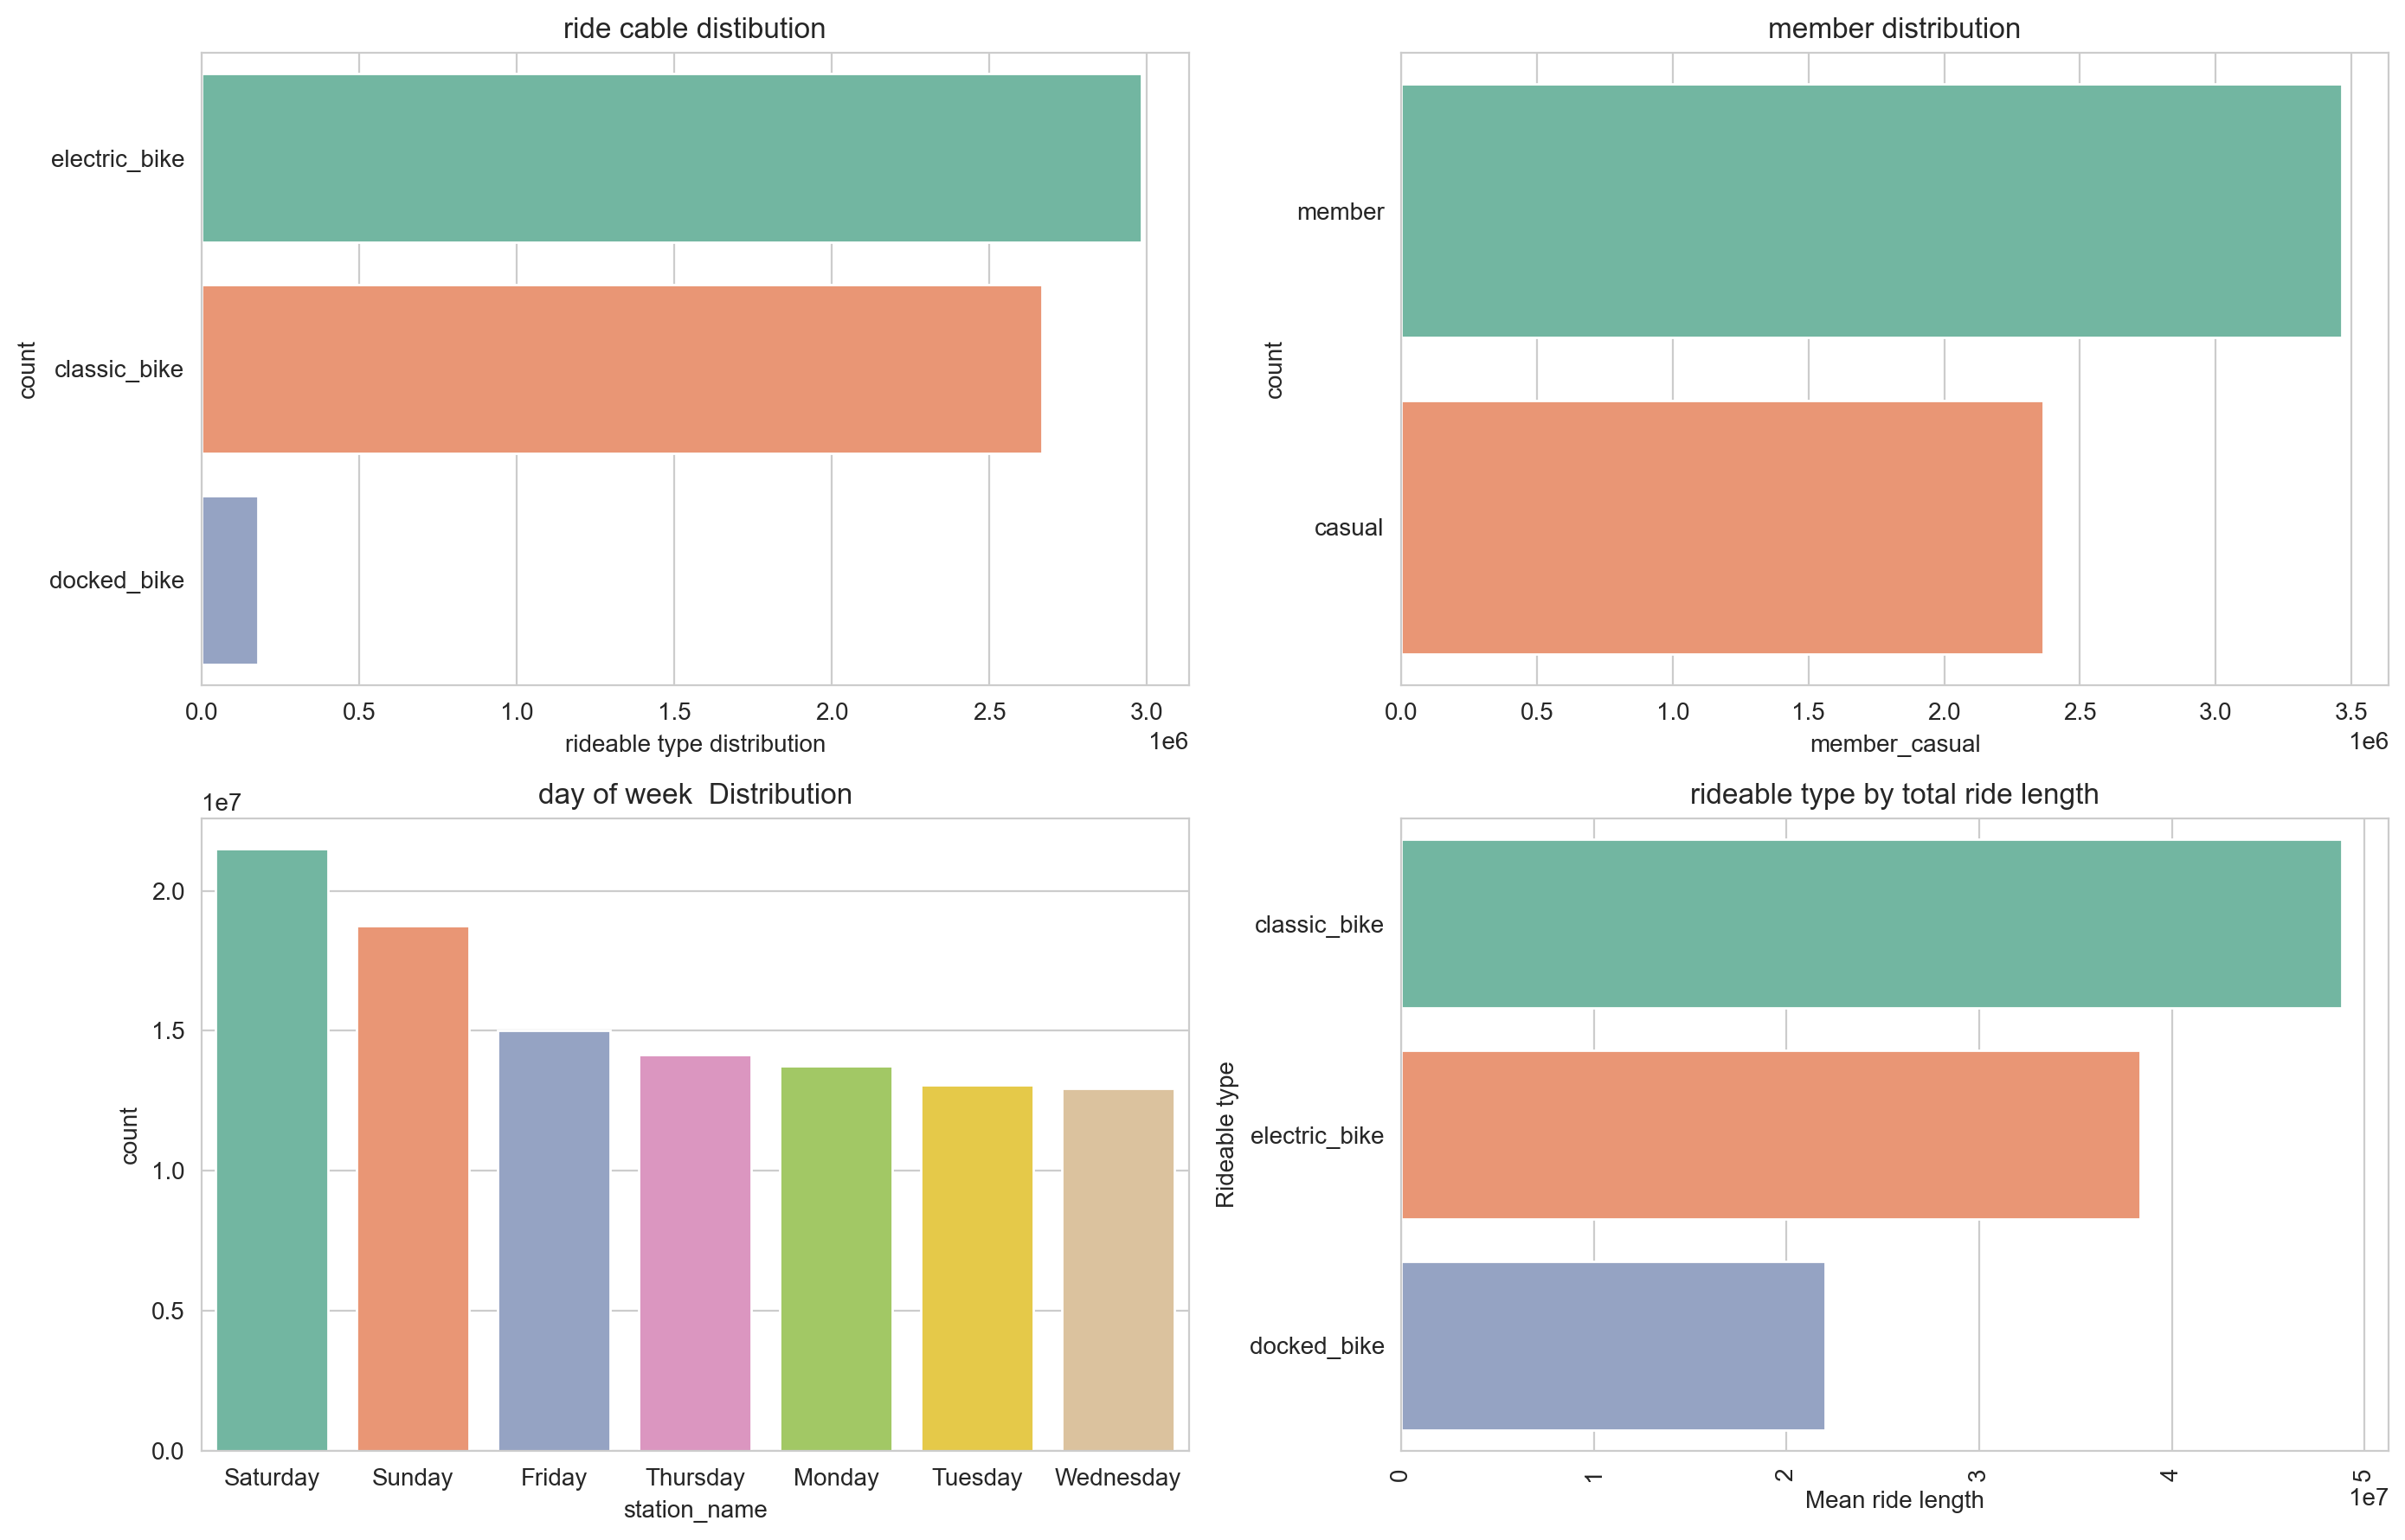

In [21]:
# Visualization setup
fig, ax = plt.subplots(2, 2, figsize=(14, 9), dpi=200)
paltette = sns.color_palette("Set2")

# rideable distibution
top_categories = bike['rideable_type'].value_counts()
sns.barplot(x=top_categories.values, y=top_categories.index, ax=ax[0, 0], palette= paltette)
ax[0, 0].set_title('ride cable distibution')
ax[0, 0].set_xlabel('rideable type distribution')
ax[0, 0].set_ylabel('count')

# member distribution
common_android_versions = bike['member_casual'].value_counts()
sns.barplot(x=common_android_versions.values, y=common_android_versions.index, ax=ax[0, 1], palette= paltette)
ax[0, 1].set_title('member distribution')
ax[0, 1].set_xlabel('member_casual')
ax[0, 1].set_ylabel('count')

# Month  Distribution
station_name = bike.groupby('day of week')['ride_duration'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=station_name.index, y=station_name.values, ax=ax[1, 0], palette= paltette)
ax[1, 0].set_title('day of week  Distribution')
ax[1, 0].set_xlabel('station_name')
ax[1, 0].set_ylabel('count')

# rideable type by Mean ride length
mean_installs_per_category = bike.groupby('rideable_type')['ride_duration'].sum().sort_values(ascending=False)
sns.barplot(x=mean_installs_per_category.values, y=mean_installs_per_category.index, ax=ax[1, 1], palette= paltette)
ax[1, 1].set_title('rideable type by total ride length')
ax[1, 1].set_xlabel('Mean ride length')
ax[1, 1].set_ylabel('Rideable type')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

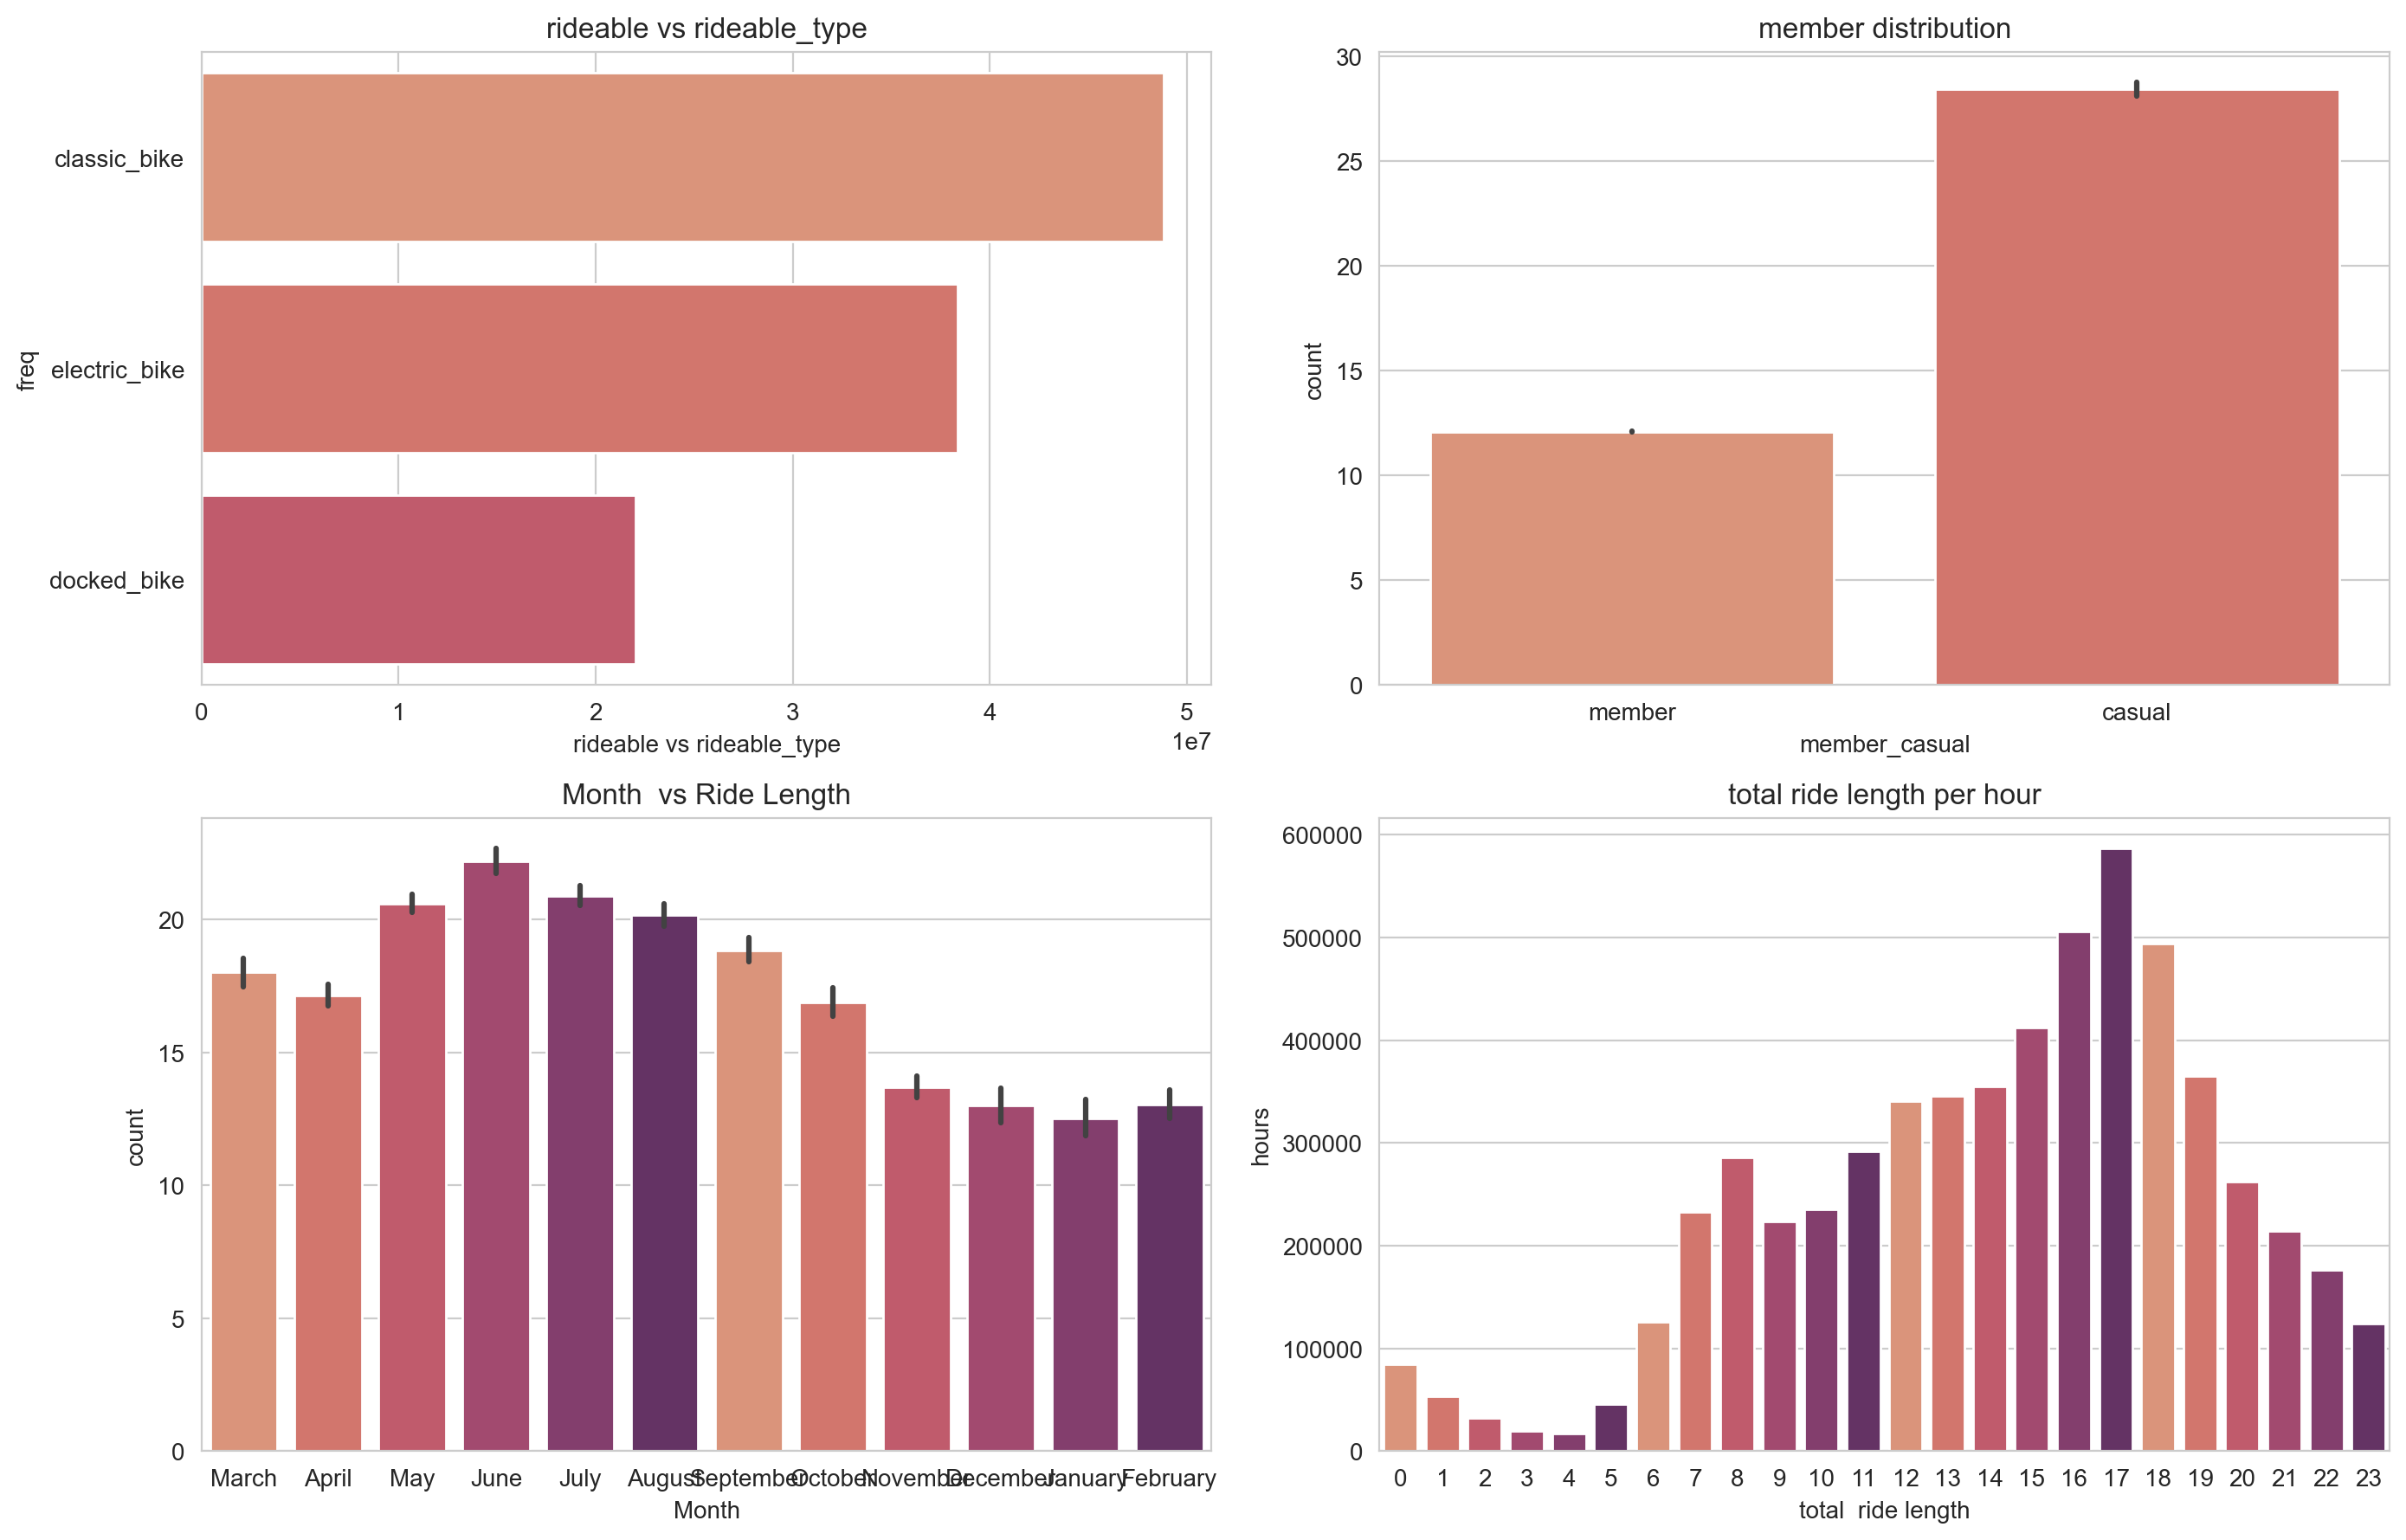

In [22]:
# Visualization setup
fig, ax = plt.subplots(2, 2, figsize=(14, 9), dpi=200)
paltette = sns.color_palette("flare")

# rideable vs rideable_type
top_categories = bike.groupby('rideable_type')['ride_duration'].sum().sort_values(ascending=False)
sns.barplot(x=top_categories.values, y=top_categories.index, ax=ax[0, 0], palette=paltette)
ax[0, 0].set_title('rideable vs rideable_type')
ax[0, 0].set_xlabel('rideable vs rideable_type')
ax[0, 0].set_ylabel('freq')

# member distribution
sns.barplot(data=bike, x='member_casual', y='ride_duration', ax=ax[0, 1], palette=paltette)
ax[0, 1].set_title('member distribution')
ax[0, 1].set_xlabel('member_casual')
ax[0, 1].set_ylabel('count')

# start station name  Distribution
sns.barplot(data=bike, x = 'Month', y='ride_duration', ax=ax[1, 0], palette=paltette)
ax[1, 0].set_title('Month  vs Ride Length')
ax[1, 0].set_xlabel('Month')
ax[1, 0].set_ylabel('count')

# rideable type by Mean ride length
sns.countplot(data=bike, x='hours',  ax=ax[1, 1], palette=paltette)
ax[1, 1].set_title('total ride length per hour')
ax[1, 1].set_xlabel('total  ride length')
ax[1, 1].set_ylabel('hours')

plt.tight_layout()
plt.show()

### Insght:

From the above graph, Which display the 4 different type of distributions: 
> bike type:
* Classic bike is on the lead of the total duration per bikr type follow by electrical bike with 48805261 per minutes
* follow by electrical bike with 38370153 per minutes
* then docked bike with 22020275 per minutes

> Customer type:
* cusual customer are ion the top list with 67299832 per minutes
* follow by the menbers with 41895857 per minutes
> Trip duratins per month:
* The total trip duration per month, from april there is an increase of trip duration. but June is the most busiest month follow by july. 
* January is the month with the lowest trip duration due to the weather condition.  
> Total trip duration per day:
* Pick hour in the morning is 8am which has more trip duration the after we have 5pm oclock the highest total duration in a day.
* from this graph we conclude that many of the customer use the bike work transportaion.

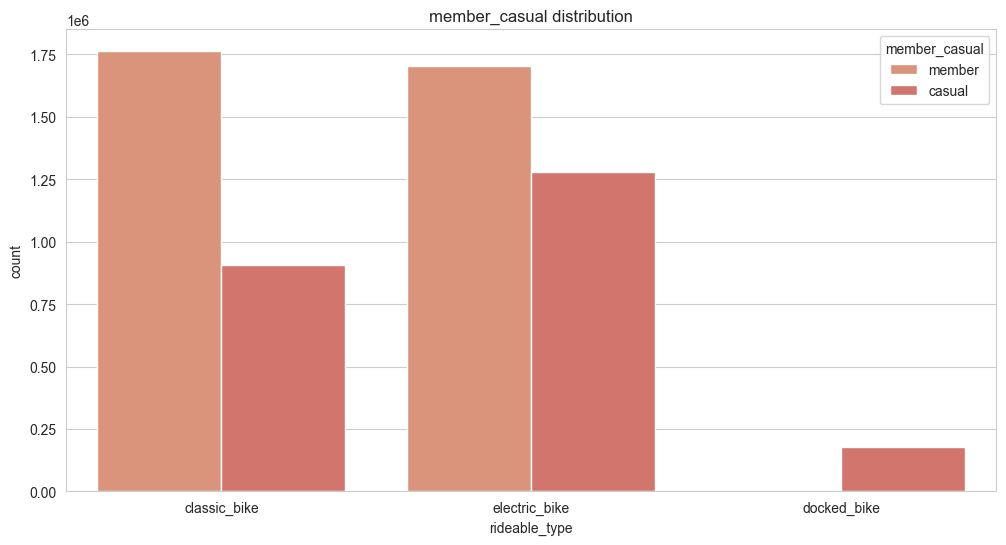

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(bike, x ='rideable_type', hue='member_casual', palette=paltette)
plt.title("member_casual distribution")
plt.show()

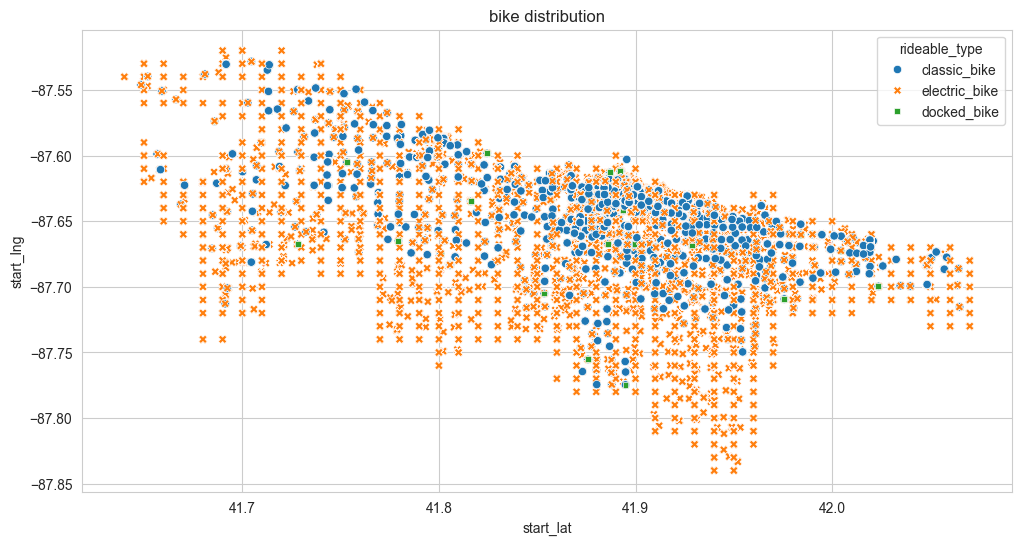

In [32]:
plt.figure(figsize=(12,6))
sns.scatterplot(bike, x ='start_lat', y='start_lng', hue='rideable_type', style='rideable_type')
plt.title("bike distribution")
plt.show()

Insight:\
In the 3 different dots color on the above graph represent the 3 different type of bike the company provided :
1. The green dots which represent the docked bike are the few and far apart distance wise. which concluded the question why there the docked_bike has high average ride duration compare to classic bike and electric bike.
2. The orange x sighs which represent electrical bike we can also see how prominent is close to each other on  the graph
3. The blue dots which represent the electrical bike on the graph 

Conclusion\
The electrical bike station are the most used follow by the classic bike then finally we have docked bike which is far apart and very few 

 ## 10 Top bike station name  

In [26]:

bike.groupby(['start_station_name','end_station_name'])['ride_id'].count().sort_values(ascending=False).head(10)

start_station_name                 end_station_name                 
Streeter Dr & Grand Ave            Streeter Dr & Grand Ave              12287
Ellis Ave & 60th St                University Ave & 57th St              7575
DuSable Lake Shore Dr & Monroe St  DuSable Lake Shore Dr & Monroe St     7458
University Ave & 57th St           Ellis Ave & 60th St                   7094
Ellis Ave & 60th St                Ellis Ave & 55th St                   6910
Ellis Ave & 55th St                Ellis Ave & 60th St                   6389
DuSable Lake Shore Dr & Monroe St  Streeter Dr & Grand Ave               5646
Michigan Ave & Oak St              Michigan Ave & Oak St                 5605
Millennium Park                    Millennium Park                       4522
State St & 33rd St                 Calumet Ave & 33rd St                 3873
Name: ride_id, dtype: int64

 ## 10 Top bike station name vs duration  

In [31]:
bike.groupby(['start_station_name','end_station_name'])['ride_duration'].aggregate(['sum','max', 'mean', 'count']).sort_values(by="sum",ascending=False).head(10)

,,sum,max,mean,count
start_station_name,end_station_name,,,,
Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,459503,1473,37.397493,12287
DuSable Lake Shore Dr & Monroe St,DuSable Lake Shore Dr & Monroe St,241205,1317,32.341781,7458
Michigan Ave & Oak St,Michigan Ave & Oak St,226204,954,40.357538,5605
Montrose Harbor,Montrose Harbor,159879,1225,43.718622,3657
Millennium Park,Millennium Park,154967,1476,34.269571,4522
DuSable Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,149424,1199,26.465462,5646
Theater on the Lake,Theater on the Lake,112244,775,36.289686,3093
DuSable Lake Shore Dr & North Blvd,DuSable Lake Shore Dr & North Blvd,104312,1109,30.943934,3371
Fort Dearborn Dr & 31st St,Fort Dearborn Dr & 31st St,102800,1443,51.144279,2010


## AB test Statistic

In [33]:
from scipy import stats

# Separate the ride durations for members and casual riders
member_durations = bike[bike['member_casual'] == 'member']['ride_duration']
casual_durations = bike[bike['member_casual'] == 'casual']['ride_duration']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(member_durations, casual_durations, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Determine if we reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in ride durations between members and casual riders.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in ride durations between members and casual riders.")

T-statistic: -91.9954913139241
P-value: 0.0
Reject the null hypothesis: There is a significant difference in ride durations between members and casual riders.


Conclusion.

p-value is 0.0 and it is less than the alpha (0.05), therefore we fail to reject the null hypothesis and conclude that the mean ride duration between members and casual riders are not the same.

## Anova oneway methode

In [ ]:
import pandas as pd
import scipy.stats as stats

# Assuming 'bike' is your DataFrame with columns 'bike_type' and 'ride_duration'
# Group ride durations by bike type
grouped_data = [group['ride_duration'].values for name, group in bike.groupby('rideable_type')]

# Perform ANOVA test
f_stat, p_val = stats.f_oneway(*grouped_data)

# Print results
print(f"F-statistic: {f_stat}, P-value: {p_val}")

# Interpret results
if p_val < 0.05:
    print("Ther ise a significant difference in ride durations between bike types.")
else:
    print("There is no significant difference in ride durations between bike types.")


F-statistic: 33776.093124207335, P-value: 0.0
There is a significant difference in ride durations between bike types.


Conclusion.

p-value is 0.0 and it is less than the alpha (0.05), therefore we fail to reject the null hypothesis and conclude that the mean ride duration of bike type are not the same.

## Summary and Recommendation     

### 1.Summary:
This notebook performs an exploratory data analysis (EDA) on the Cyclistic bike-share dataset, which includes data from March 2022 to February 2023. The analysis includes the following steps:

1. **Data Loading and Preparation**:
    - Loaded 12 CSV files, each representing a month of data, and combined them into a single DataFrame.
    - Converted date columns to datetime format and extracted additional features such as month, day of the week, and hour.
    - Calculated ride duration and removed negative values.

2. **Data Cleaning**:
    - Checked for and removed duplicate entries.
    - Ensured the data types of columns were appropriate for analysis.

3. **Exploratory Data Analysis (EDA)**:
    - Analyzed ride duration statistics and grouped data by month, bike type, and customer type.
    - Created pivot tables to summarize ride duration and count by bike type and customer type.
    - Visualized data distributions using histograms, boxplots, and bar plots.
    - Identified the busiest times of day and the most popular bike types and stations.

4. **Statistical Analysis**:
    - Performed a t-test to compare ride durations between members and casual riders.
    - Conducted an ANOVA to analyze the effect of bike type on ride duration.

### 2.Recommendations:
1. **Marketing Strategy**:
    - Focus marketing efforts on promoting electric bikes, as they are the most popular among customers.
    - Develop targeted campaigns for casual riders, who have longer ride durations on average.

2. **Operational Improvements**:
    - Increase the availability of bikes during peak hours (8 AM and 5 PM) to meet high demand.
    - Ensure that popular stations are well-stocked with bikes, especially during weekends.

3. **Customer Experience**:
    - Consider offering incentives or discounts for rides during off-peak hours to balance demand.
    - Improve the user experience for casual riders to encourage them to become members.

4. **Further Analysis**:
    - Investigate the reasons behind the high usage of electric bikes and explore opportunities to expand the fleet.
    - Analyze the impact of weather conditions on ride patterns and adjust operations accordingly.

By implementing these recommendations, Cyclistic can enhance customer satisfaction, optimize operations, and increase overall usage of the bike-share program.